In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ko_data=pd.read_csv('sentences.csv', encoding='utf-8')

In [3]:
ko_data_id = ko_data['id']
ko_data_text = ko_data['sentences']

In [4]:
ko_pos_dic = pd.read_csv('ko_pos.txt', encoding='utf-8')
ko_neg_dic = pd.read_csv('ko_neg.txt', encoding='utf-8')

In [5]:
ko_pos_words = set(ko_pos_dic['POSITIVE'].tolist())
ko_neg_words = set(ko_neg_dic['NEGATIVE'].tolist())

In [6]:
ko_pos_score = []
ko_neg_score = []
ko_sent_score = []

In [7]:
ko_data_text=ko_data_text.tolist()

In [8]:
for doc in ko_data_text:
    doc=doc.split()
    posS = len([w for w in doc if w in ko_pos_words])
    negS = len([w for w in doc if w in ko_neg_words])
    sentS = posS-negS
    ko_pos_score.append(posS)
    ko_neg_score.append(negS)
    ko_sent_score.append(sentS)

In [9]:
ko_sent_df=pd.DataFrame.from_records(zip(ko_data_id, ko_data_text, 
     ko_pos_score, ko_neg_score, ko_sent_score), columns=['ID', 'TEXT', 'POS', 'NEG', 'SCORE'])

In [10]:
ko_sent_summary=ko_sent_df.groupby('ID', as_index=False)['POS', 'NEG', 'SCORE'].mean()

In [11]:
ko_sent_summary.to_csv("sentimental_summary.csv", mode='w')

In [12]:
barWidth = 0.25
lineWidth = 2
graphPOS = np.arange(len(ko_sent_summary.POS))
graphNEG = [x + barWidth for x in graphPOS]
graphSCORE = [x + barWidth for x in graphNEG]

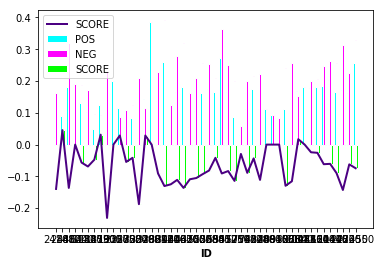

In [13]:
plt.bar(graphPOS, ko_sent_summary.POS, color='cyan', width=barWidth, edgecolor='white', label='POS')
plt.bar(graphNEG, ko_sent_summary.NEG, color='magenta', width=barWidth, edgecolor='white', label='NEG')
plt.bar(graphSCORE, ko_sent_summary.SCORE, color='lime', width=barWidth, edgecolor='white', label='SCORE')
plt.plot(graphNEG,ko_sent_summary.SCORE, color='indigo', linewidth=lineWidth)

plt.xlabel('ID', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(ko_sent_summary.POS))], [text for text in ko_sent_summary.ID])

plt.legend()
plt.show()

In [14]:
ko_pos_dic = pd.read_csv('Financial_Positive.txt', encoding='utf-8')
ko_neg_dic = pd.read_csv('Financial_Negative.txt', encoding='utf-8')

In [15]:
ko_pos_words = set(ko_pos_dic['POSITIVE'].tolist())
ko_neg_words = set(ko_neg_dic['NEGATIVE'].tolist())

In [16]:
ko_pos_score = []
ko_neg_score = []
ko_sent_score = []

In [17]:
for doc in ko_data_text:
    doc=doc.split()
    posS = len([w for w in doc if w in ko_pos_words])
    negS = len([w for w in doc if w in ko_neg_words])
    sentS = posS-negS
    ko_pos_score.append(posS)
    ko_neg_score.append(negS)
    ko_sent_score.append(sentS)

In [18]:
ko_sent_df=pd.DataFrame.from_records(zip(ko_data_id, ko_data_text, 
     ko_pos_score, ko_neg_score, ko_sent_score), columns=['ID', 'TEXT', 'POS', 'NEG', 'SCORE'])

In [19]:
ko_sent_summary=ko_sent_df.groupby('ID', as_index=False)['POS', 'NEG', 'SCORE'].mean()

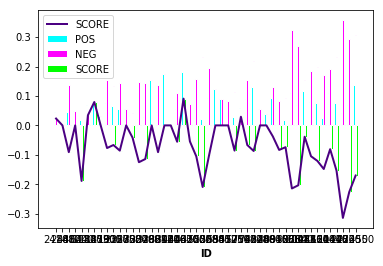

In [20]:
plt.bar(graphPOS, ko_sent_summary.POS, color='cyan', width=barWidth, edgecolor='white', label='POS')
plt.bar(graphNEG, ko_sent_summary.NEG, color='magenta', width=barWidth, edgecolor='white', label='NEG')
plt.bar(graphSCORE, ko_sent_summary.SCORE, color='lime', width=barWidth, edgecolor='white', label='SCORE')
plt.plot(graphNEG,ko_sent_summary.SCORE, color='indigo', linewidth=lineWidth)

plt.xlabel('ID', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(ko_sent_summary.POS))], [text for text in ko_sent_summary.ID])

plt.legend()
plt.show()

In [21]:
ko_sent_summary.to_csv("sentimental_summary2.csv", mode='w')